In [ ]:
# Description
# Import packages
# Import edr data
# For 1 track, calcuate beta, alpha, etc

In [9]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df = pd.read_csv(r'C:\Users\stpop\Documents\MATLAB\clean_695423\HRM_W1_ants.txt')
df = df[df.id==1]

In [43]:
df

,x,y,t,id,dFrames,s,v,a,disp,theta,alpha,sin,cos,adist,wall,nestDisp,tandem,asum
2,2155.167,557.4882,64.77796,1,0.180412,1.804509,10.002140,5.184543,3.590977,2.830566,3.601545,0.062817,0.998025,1.995859,0,24.46650,0,3.601545
3,2155.369,559.2792,64.96245,1,0.184486,1.802299,9.769281,-1.262189,5.393188,6.432115,-14.664120,-0.253152,0.967426,-8.136337,0,26.03269,0,-11.062575
4,2155.111,561.0612,65.14613,1,0.183685,1.800596,9.802614,0.181467,7.152416,-8.232003,-22.512510,-0.382885,0.923796,-12.502810,0,27.78324,0,-33.575085
5,2154.191,562.6082,65.36163,1,0.215500,1.799974,8.352551,-6.728833,8.714875,-30.744510,2.952841,0.051514,0.998672,1.640491,0,29.56044,0,-30.622244
6,2153.352,564.1998,65.60490,1,0.243263,1.799148,7.395888,-3.932627,10.387170,-27.791680,-8.539185,-0.148486,0.988915,-4.746239,0,31.35063,0,-39.161429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,2163.724,599.1295,633.56490,1,0.226196,1.795872,7.939441,-4.286796,46.085000,128.970300,12.839490,0.222220,0.974996,7.149443,0,63.96575,0,-221.020495
2270,2164.840,597.7109,633.77960,1,0.214722,1.804971,8.406097,2.173307,44.929940,141.809800,-16.347920,-0.281469,0.959570,-9.057164,0,62.53082,0,-237.368415
2271,2166.308,596.6652,633.94040,1,0.160828,1.802351,11.206720,17.413830,44.269770,125.461900,-6.691632,-0.116526,0.993188,-3.712724,0,61.49371,0,-244.060047
2272,2167.885,595.7994,634.15260,1,0.212158,1.798976,8.479408,-12.855100,43.878100,118.770300,-1.515250,-0.026443,0.999650,-0.842285,0,60.67686,0,-245.575297


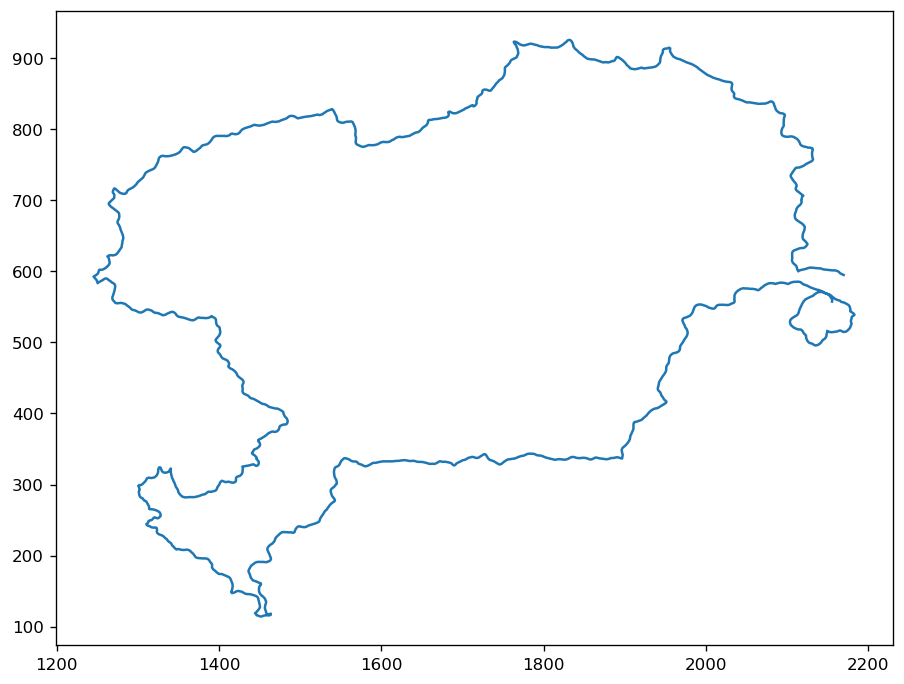

In [42]:
plt.plot(df.x,df.y)

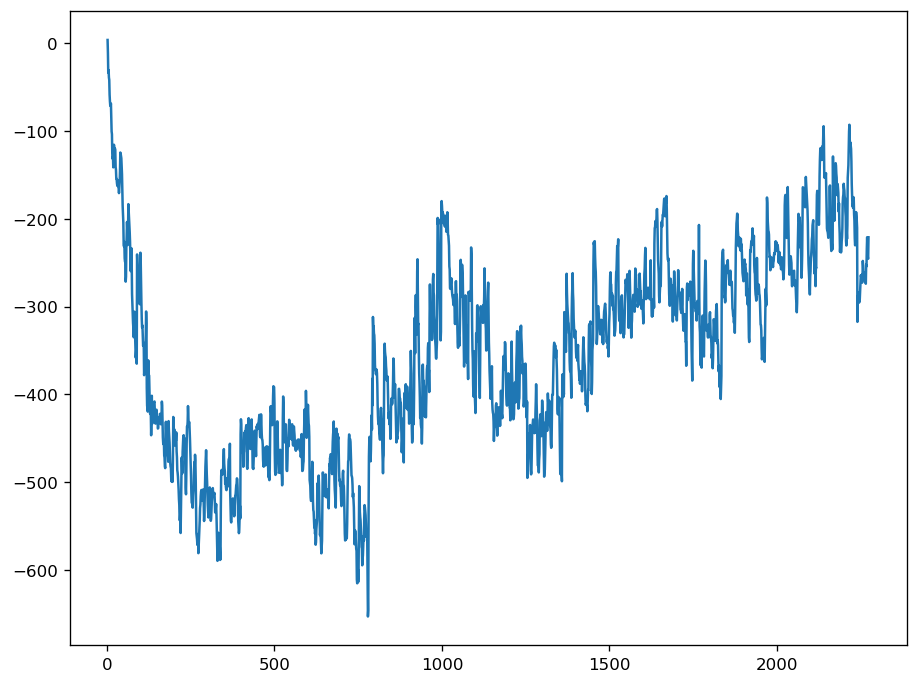

In [44]:
plt.plot(np.cumsum(df.alpha))

In [ ]:
df['asum'] = np.cumsum(df.alpha)

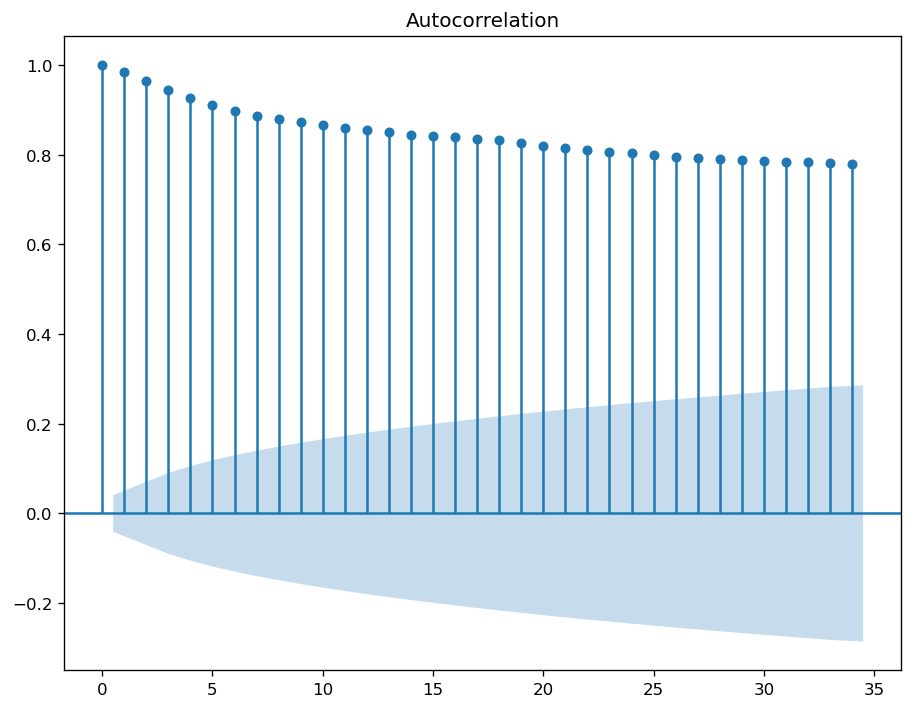

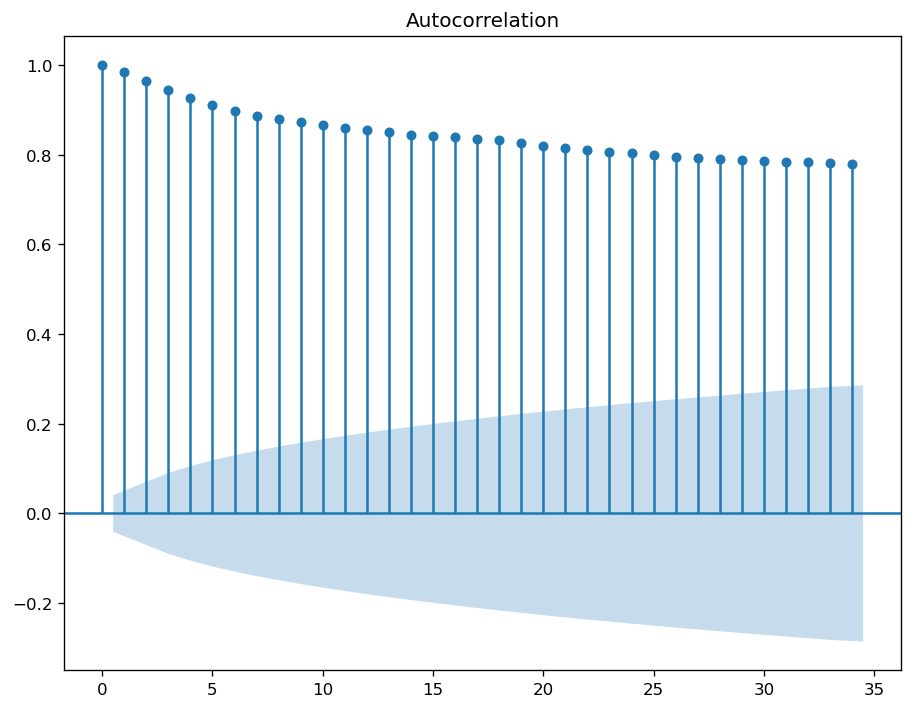

In [38]:
plot_acf(df.asum.dropna())

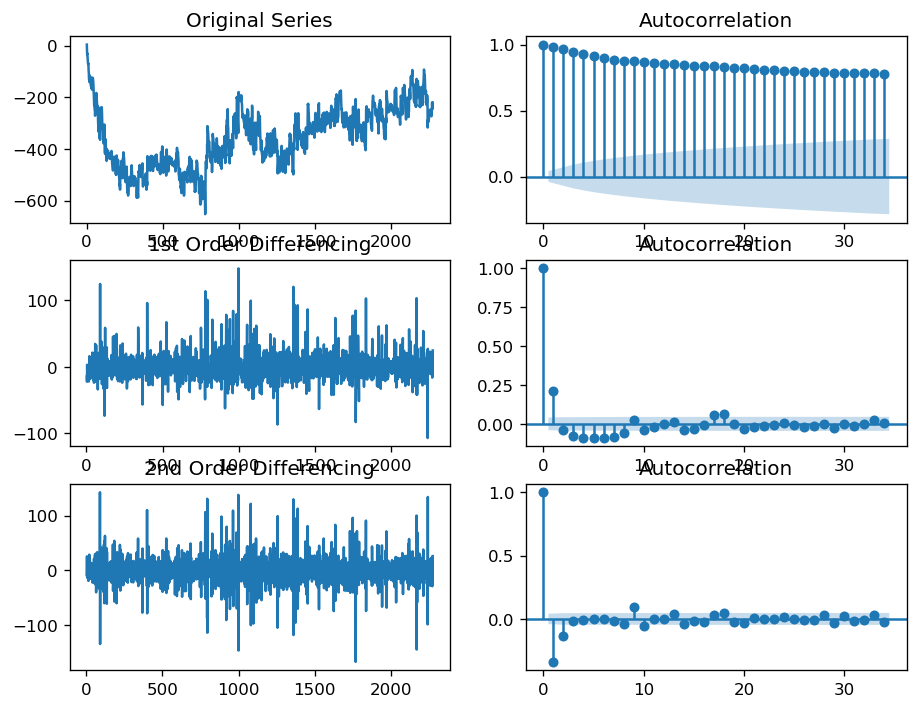

In [41]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data

# Original Series
fig, axes = plt.subplots(3, 2)#, sharex=True)
axes[0, 0].plot(df.asum); axes[0, 0].set_title('Original Series')
plot_acf(df.asum.dropna(), ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.asum.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.asum.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.asum.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.asum.diff().diff().dropna(), ax=axes[2, 1])

plt.show()